<a href="https://colab.research.google.com/github/quantwav/Lab4-dsff/blob/main/%E2%80%9CLab5_0407_2142.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook Settings**

In [1]:
%matplotlib inline
# Use %matplotlib ipympl or %matplotlib widget if you want interactive matplotlib plots
#%matplotlib widget

# Shuts off Jedi to speed up tab completions
# the command %config Completer.use_jedi = False is used in IPython or Jupyter environments to disable the use of the Jedi library for autocompletion, which can sometimes lead to faster completion suggestions.
%config Completer.use_jedi = False

# reloads modules automatically before entering the execution of code typed at the IPython prompt
%load_ext autoreload
%autoreload 2

In [2]:
import multiprocessing
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy.stats as ss
import seaborn as sns

## Import various ML classes from Scikit-learn
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
import statsmodels.api as sm

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, PrecisionRecallDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict, StratifiedShuffleSplit, train_test_split

import string
from time import time

In [3]:
#mport ast refers to importing the ast module, which is a part of Python's standard library. The ast module provides facilities for processing, analyzing, and modifying Abstract Syntax Trees (ASTs).
import ast
import datetime
from functools import reduce
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import plotly.express as px
import seaborn as sns
import scipy.stats as ss
#The primary use of the tqdm function is to wrap around any iterable, like a list or a loop, to display a smart progress meter.
#For example, if you have a for loop that iterates over a large dataset, you can wrap tqdm around the iterable, and it will display a progress bar that updates with each iteration.
from tqdm import tqdm

!pip install itables
# To display dataframes as interactive tables in the notebook:
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.6/215.6 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.7 MB/s eta 0:00:00


In [4]:
import ast
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import seaborn as sns
import scipy.stats as ss

In [5]:
import os
# https://drive.google.com/file/d/19LbtW4l9fNhGZ-6NxINfD7NjEuSK6YH2/view?usp=sharing


if not os.path.exists("20-raterx-data.pq"):
    !gdown --id 19LbtW4l9fNhGZ-6NxINfD7NjEuSK6YH2

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=19LbtW4l9fNhGZ-6NxINfD7NjEuSK6YH2
To: /content/20-raterx-data.pq
100% 3.52M/3.52M [00:00<00:00, 112MB/s]


In [6]:
plt.rcParams.update({'font.size': 16})
DFILE = '20-raterx-data.pq'
SEED = 24
TOL = 1.0e-8

# **Problem 1**

In [7]:
import pyarrow.parquet as pq

DFILE = '20-raterx-data.pq'
df = pq.read_table(DFILE).to_pandas()
df

gvkey   datadate             conm    sich credit_rating     che  \
0        1004 1990-05-31         AAR CORP  5080.0           BBB   4.044   
1        1004 1991-05-31         AAR CORP  5080.0           BBB   1.553   
2        1004 1992-05-31         AAR CORP  5080.0           BBB   4.197   
3        1004 1993-05-31         AAR CORP  5080.0           BBB   2.255   
4        1004 1994-05-31         AAR CORP  5080.0           BBB  18.074   
...       ...        ...              ...     ...           ...     ...   
26924  266163 2008-12-31  DUNE ENERGY INC  1311.0            B-  15.492   
26925  266163 2009-12-31  DUNE ENERGY INC  1311.0          CCC-  15.053   
26926  266163 2010-12-31  DUNE ENERGY INC  1311.0          CCC-  39.423   
26927  311524 2012-12-31     TAMINCO CORP  2860.0            B+  67.000   
26928  311524 2013-12-31     TAMINCO CORP  2860.0            B+  88.000   

           act    ppent        at     dlc  ...      sale     cogs     xsga  \
0      275.576   63.441   388.521  33.821  ...   444.875  336.931   53.912   
1      268.399   63.415   379.958  16.500  ...   466.542  366.040   58.545   
2      289.537   60.422   395.351  25.005  ...   422.657  331.056   56.910   
3      265.036   56.052   365.151  25.025  ...   382.780  307.436   52.093   
4      307.723   54.783   417.626   0.568  ...   407.754  328.562   50.086   
...        ...      ...       ...     ...  ...       ...      ...      ...   
26924   40.895  357.284   402.052   2.014  ...   146.600  169.196   18.586   
26925   32.805  334.328   372.587   1.579  ...    64.873   34.757   14.321   
26926   51.829  232.721   297.386   1.395  ...    64.189   60.175   11.157   
26927  297.000  434.000  1847.000   6.000  ...  1116.000  823.200  128.000   
26928  311.000  470.000  1856.000   7.000  ...  1200.000  871.200   79.000   

       xrent    oibdp    oiadp    xint  intc       ib      dvp  
0       4.25   54.032   46.851   9.989   0.0   25.655    0.000  
1       4.31   41.957   33.701  10.073   0.0   14.801    0.000  
2       4.85   34.691   26.530   8.356   0.0   10.020    0.000  
3       5.32   23.251   16.343   8.107   0.0    0.283    0.000  
4       4.84   29.106   21.824   9.564   0.0    9.484    0.000  
...      ...      ...      ...     ...   ...      ...      ...  
26924   0.90  -41.182  -98.786  35.022   0.0 -108.728  100.597  
26925   0.80   15.795  -21.202  35.193   0.0  -59.131   36.728  
26926   0.80   -7.143  -36.020  37.424   0.0  -72.057   26.419  
26927  16.60  164.800   67.000  78.200   0.2  -82.000    0.000  
26928  17.10  249.800  135.000  84.500   0.5   -7.000    0.000  

[26929 rows x 27 columns]

In [8]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 26929 rows and 27 columns.


In [9]:
print(df.columns)
print(df.dtypes)

Index(['gvkey', 'datadate', 'conm', 'sich', 'credit_rating', 'che', 'act',
       'ppent', 'at', 'dlc', 'lct', 'dltt', 'lt', 'txdb', 're', 'seq', 'mib',
       'sale', 'cogs', 'xsga', 'xrent', 'oibdp', 'oiadp', 'xint', 'intc', 'ib',
       'dvp'],
      dtype='object')
gvkey                     int64
datadate         datetime64[us]
conm                     object
sich                    float64
credit_rating          category
che                     float64
act                     float64
ppent                   float64
at                      float64
dlc                     float64
lct                     float64
dltt                    float64
lt                      float64
txdb                    float64
re                      float64
seq                     float64
mib                     float64
sale                    float64
cogs                    float64
xsga                    float64
xrent                   float64
oibdp                   float64
oiadp                   fl

In [10]:
print(df.isnull().sum())

gvkey               0
datadate            0
conm                0
sich                0
credit_rating       0
che                50
act              1359
ppent              98
at                 37
dlc                82
lct              1237
dltt               49
lt                 45
txdb             1898
re                771
seq                36
mib              3909
sale               49
cogs               49
xsga             2262
xrent            1871
oibdp              98
oiadp              50
xint              299
intc             2033
ib                 49
dvp                50
dtype: int64


In [11]:
duplicates = df.duplicated()
print(f"There are {duplicates.sum()} duplicated rows.")

There are 0 duplicated rows.


In [12]:
print(df.describe())

               gvkey                    datadate          sich            che  \
count   26929.000000                       26929  26929.000000   26879.000000   
mean    39780.657210  2003-11-14 04:43:40.758290   4162.580267     720.860158   
min      1004.000000         1990-01-31 00:00:00    100.000000       0.000000   
25%      6386.000000         1997-12-31 00:00:00   2834.000000      20.719000   
50%     12480.000000         2003-10-31 00:00:00   3711.000000      86.504000   
75%     61338.000000         2009-12-31 00:00:00   5172.000000     355.650000   
max    311524.000000         2016-12-31 00:00:00   9997.000000  113240.000000   
std     53590.724638                         NaN   1910.456502    3516.283431   

                 act          ppent             at            dlc  \
count   25570.000000   26831.000000   26892.000000   26847.000000   
mean     2162.046753    2684.529699    8225.283046     511.319648   
min         0.861000       0.000000       0.861000    -882.0000

## Limitations and Issues:

1. Several columns have missing values, necessitating decisions on how to handle missing data through

2. Limited contextual information and potential data quality issues, such as outliers or inconsistencies, may require further research and data validation.


# **Problem 2**
Perform feature engineering on the data to construct a set of predictors for your model.

In [13]:
df = pd.read_parquet(DFILE)

# Function to apply log transformation with custom handling for negative values
def log_transform(x):
    if x > 0:
        return np.log(x)
    else:
        return -1

vlist = [ 'che', 'act',
       'ppent', 'at', 'dlc', 'lct', 'dltt', 'lt', 'txdb', 're', 'seq', 'mib',
       'sale', 'cogs', 'xsga', 'xrent', 'oibdp', 'oiadp', 'xint', 'intc', 'ib',
       'dvp']

for i in vlist:
  df['l_'+i] = df[i].apply(lambda x: np.log(x) if x > 0 else -1)

df

gvkey   datadate             conm    sich credit_rating     che  \
0        1004 1990-05-31         AAR CORP  5080.0           BBB   4.044   
1        1004 1991-05-31         AAR CORP  5080.0           BBB   1.553   
2        1004 1992-05-31         AAR CORP  5080.0           BBB   4.197   
3        1004 1993-05-31         AAR CORP  5080.0           BBB   2.255   
4        1004 1994-05-31         AAR CORP  5080.0           BBB  18.074   
...       ...        ...              ...     ...           ...     ...   
26924  266163 2008-12-31  DUNE ENERGY INC  1311.0            B-  15.492   
26925  266163 2009-12-31  DUNE ENERGY INC  1311.0          CCC-  15.053   
26926  266163 2010-12-31  DUNE ENERGY INC  1311.0          CCC-  39.423   
26927  311524 2012-12-31     TAMINCO CORP  2860.0            B+  67.000   
26928  311524 2013-12-31     TAMINCO CORP  2860.0            B+  88.000   

           act    ppent        at     dlc  ...    l_sale    l_cogs    l_xsga  \
0      275.576   63.441   388.521  33.821  ...  6.097793  5.819878  3.987353   
1      268.399   63.415   379.958  16.500  ...  6.145348  5.902743  4.069796   
2      289.537   60.422   395.351  25.005  ...  6.046561  5.802288  4.041471   
3      265.036   56.052   365.151  25.025  ...  5.947460  5.728267  3.953031   
4      307.723   54.783   417.626   0.568  ...  6.010664  5.794726  3.913742   
...        ...      ...       ...     ...  ...       ...       ...       ...   
26924   40.895  357.284   402.052   2.014  ...  4.987708  5.131058  2.922409   
26925   32.805  334.328   372.587   1.579  ...  4.172432  3.548381  2.661727   
26926   51.829  232.721   297.386   1.395  ...  4.161832  4.097257  2.412067   
26927  297.000  434.000  1847.000   6.000  ...  7.017506  6.713199  4.852030   
26928  311.000  470.000  1856.000   7.000  ...  7.090077  6.769872  4.369448   

        l_xrent   l_oibdp   l_oiadp    l_xint    l_intc      l_ib     l_dvp  
0      1.446919  3.989576  3.846972  2.301484 -1.000000  3.244738 -1.000000  
1      1.460938  3.736645  3.517528  2.309859 -1.000000  2.694695 -1.000000  
2      1.578979  3.546480  3.278276  2.122980 -1.000000  2.304583 -1.000000  
3      1.671473  3.146348  2.793800  2.092728 -1.000000 -1.262308 -1.000000  
4      1.576915  3.370944  3.083010  2.258006 -1.000000  2.249606 -1.000000  
...         ...       ...       ...       ...       ...       ...       ...  
26924 -0.105361 -1.000000 -1.000000  3.555976 -1.000000 -1.000000  4.611122  
26925 -0.223144  2.759693 -1.000000  3.560847 -1.000000 -1.000000  3.603539  
26926 -0.223144 -1.000000 -1.000000  3.622312 -1.000000 -1.000000  3.274083  
26927  2.809403  5.104733  4.204693  4.359270 -1.609438 -1.000000 -1.000000  
26928  2.839078  5.520661  4.905275  4.436752 -0.693147 -1.000000 -1.000000  

[26929 rows x 49 columns]

 a. What variables do you think will be informative about a firms’ credit ratings? Justify your choices.


In [14]:
# Mapping from credit ratings to numbers
credit_rating_to_number = {
    'AAA': 1,
    'AA+': 1,
    'AA': 1,
    'AA-': 1,
    'A+': 1,
    'A': 1,
    'A-': 1,
    'BBB+': 1,
    'BBB': 1,
    'BBB-': 1,
    'BB+': 0,
    'BB': 0,
    'BB-': 0,
    'B+': 0,
    'B': 0,
    'B-': 0,
    'CCC+': 0,
    'CCC': 0,
    'CCC-': 0,
    'CC': 0,
    'C': 0,
    'D': 0,
}

df['credit_rating_number'] = df['credit_rating'].map(credit_rating_to_number)
df = df.dropna()
df

gvkey   datadate             conm    sich credit_rating     che  \
0        1004 1990-05-31         AAR CORP  5080.0           BBB   4.044   
1        1004 1991-05-31         AAR CORP  5080.0           BBB   1.553   
2        1004 1992-05-31         AAR CORP  5080.0           BBB   4.197   
3        1004 1993-05-31         AAR CORP  5080.0           BBB   2.255   
4        1004 1994-05-31         AAR CORP  5080.0           BBB  18.074   
...       ...        ...              ...     ...           ...     ...   
26924  266163 2008-12-31  DUNE ENERGY INC  1311.0            B-  15.492   
26925  266163 2009-12-31  DUNE ENERGY INC  1311.0          CCC-  15.053   
26926  266163 2010-12-31  DUNE ENERGY INC  1311.0          CCC-  39.423   
26927  311524 2012-12-31     TAMINCO CORP  2860.0            B+  67.000   
26928  311524 2013-12-31     TAMINCO CORP  2860.0            B+  88.000   

           act    ppent        at     dlc  ...    l_cogs    l_xsga   l_xrent  \
0      275.576   63.441   388.521  33.821  ...  5.819878  3.987353  1.446919   
1      268.399   63.415   379.958  16.500  ...  5.902743  4.069796  1.460938   
2      289.537   60.422   395.351  25.005  ...  5.802288  4.041471  1.578979   
3      265.036   56.052   365.151  25.025  ...  5.728267  3.953031  1.671473   
4      307.723   54.783   417.626   0.568  ...  5.794726  3.913742  1.576915   
...        ...      ...       ...     ...  ...       ...       ...       ...   
26924   40.895  357.284   402.052   2.014  ...  5.131058  2.922409 -0.105361   
26925   32.805  334.328   372.587   1.579  ...  3.548381  2.661727 -0.223144   
26926   51.829  232.721   297.386   1.395  ...  4.097257  2.412067 -0.223144   
26927  297.000  434.000  1847.000   6.000  ...  6.713199  4.852030  2.809403   
26928  311.000  470.000  1856.000   7.000  ...  6.769872  4.369448  2.839078   

        l_oibdp   l_oiadp    l_xint    l_intc      l_ib     l_dvp  \
0      3.989576  3.846972  2.301484 -1.000000  3.244738 -1.000000   
1      3.736645  3.517528  2.309859 -1.000000  2.694695 -1.000000   
2      3.546480  3.278276  2.122980 -1.000000  2.304583 -1.000000   
3      3.146348  2.793800  2.092728 -1.000000 -1.262308 -1.000000   
4      3.370944  3.083010  2.258006 -1.000000  2.249606 -1.000000   
...         ...       ...       ...       ...       ...       ...   
26924 -1.000000 -1.000000  3.555976 -1.000000 -1.000000  4.611122   
26925  2.759693 -1.000000  3.560847 -1.000000 -1.000000  3.603539   
26926 -1.000000 -1.000000  3.622312 -1.000000 -1.000000  3.274083   
26927  5.104733  4.204693  4.359270 -1.609438 -1.000000 -1.000000   
26928  5.520661  4.905275  4.436752 -0.693147 -1.000000 -1.000000   

       credit_rating_number  
0                         1  
1                         1  
2                         1  
3                         1  
4                         1  
...                     ...  
26924                     0  
26925                     0  
26926                     0  
26927                     0  
26928                     0  

[15986 rows x 50 columns]

In [15]:
df['current_ratio'] = df['act'] / df['lct']
df['interest_coverage'] = df['oibdp'] / df['xint']
df['return_on_equity'] = df['ib'] / df['seq']
df['asset_turnover'] = df['sale'] / df['at']

df['gross_profit_margin'] = (df['sale'] - df['cogs']) / df['sale']
df['operating_margin'] = df['oibdp'] / df['sale']
df['net_profit_margin'] = df['ib'] / df['sale']
df['return_on_asset'] = df['ib'] / df['at']
df['debt_ratio'] = df['lt'] / df['at']

<ipython-input-15-15ec4630452a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['current_ratio'] = df['act'] / df['lct']
<ipython-input-15-15ec4630452a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['interest_coverage'] = df['oibdp'] / df['xint']
<ipython-input-15-15ec4630452a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [16]:
df_new = df

In [17]:
# 将无穷大值替换为NaN
df_new.replace([np.inf, -np.inf], np.nan, inplace=True)

# 移除含有NaN的行
df_new.dropna(inplace=True)
df_new

<ipython-input-17-39c64934e699>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-17-39c64934e699>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.dropna(inplace=True)


gvkey   datadate             conm    sich credit_rating     che  \
0        1004 1990-05-31         AAR CORP  5080.0           BBB   4.044   
1        1004 1991-05-31         AAR CORP  5080.0           BBB   1.553   
2        1004 1992-05-31         AAR CORP  5080.0           BBB   4.197   
3        1004 1993-05-31         AAR CORP  5080.0           BBB   2.255   
4        1004 1994-05-31         AAR CORP  5080.0           BBB  18.074   
...       ...        ...              ...     ...           ...     ...   
26924  266163 2008-12-31  DUNE ENERGY INC  1311.0            B-  15.492   
26925  266163 2009-12-31  DUNE ENERGY INC  1311.0          CCC-  15.053   
26926  266163 2010-12-31  DUNE ENERGY INC  1311.0          CCC-  39.423   
26927  311524 2012-12-31     TAMINCO CORP  2860.0            B+  67.000   
26928  311524 2013-12-31     TAMINCO CORP  2860.0            B+  88.000   

           act    ppent        at     dlc  ...  credit_rating_number  \
0      275.576   63.441   388.521  33.821  ...                     1   
1      268.399   63.415   379.958  16.500  ...                     1   
2      289.537   60.422   395.351  25.005  ...                     1   
3      265.036   56.052   365.151  25.025  ...                     1   
4      307.723   54.783   417.626   0.568  ...                     1   
...        ...      ...       ...     ...  ...                   ...   
26924   40.895  357.284   402.052   2.014  ...                     0   
26925   32.805  334.328   372.587   1.579  ...                     0   
26926   51.829  232.721   297.386   1.395  ...                     0   
26927  297.000  434.000  1847.000   6.000  ...                     0   
26928  311.000  470.000  1856.000   7.000  ...                     0   

       current_ratio  interest_coverage  return_on_equity  asset_turnover  \
0           3.040201           5.409150          0.135348        1.145048   
1           3.387721           4.165293          0.076381        1.227878   
2           3.137218           4.151628          0.050931        1.069068   
3           3.699708           2.868015          0.001496        1.048279   
4           4.544452           3.043287          0.050051        0.976362   
...              ...                ...               ...             ...   
26924       0.885883          -1.175889         -2.150900        0.364629   
26925       0.850355           0.448811        193.872131        0.174115   
26926       2.166492          -0.190867          0.969759        0.215844   
26927       2.076923           2.107417         -0.302583        0.604223   
26928       2.006452           2.956213         -0.013333        0.646552   

       gross_profit_margin  operating_margin  net_profit_margin  \
0                 0.242639          0.121454           0.057668   
1                 0.215419          0.089932           0.031725   
2                 0.216727          0.082078           0.023707   
3                 0.196834          0.060742           0.000739   
4                 0.194215          0.071381           0.023259   
...                    ...               ...                ...   
26924            -0.154134         -0.280914          -0.741664   
26925             0.464230          0.243476          -0.911489   
26926             0.062534         -0.111281          -1.122576   
26927             0.262366          0.147670          -0.073477   
26928             0.274000          0.208167          -0.005833   

       return_on_asset  debt_ratio  
0             0.066032    0.512129  
1             0.038954    0.490002  
2             0.025345    0.502374  
3             0.000775    0.481814  
4             0.022709    0.546273  
...                ...         ...  
26924        -0.270433    0.874270  
26925        -0.158704    1.000819  
26926        -0.242301    1.249857  
26927        -0.044396    0.853276  
26928        -0.003772    0.717134  

[15940 rows x 59 columns]

In [18]:
df_new.columns

Index(['gvkey', 'datadate', 'conm', 'sich', 'credit_rating', 'che', 'act',
       'ppent', 'at', 'dlc', 'lct', 'dltt', 'lt', 'txdb', 're', 'seq', 'mib',
       'sale', 'cogs', 'xsga', 'xrent', 'oibdp', 'oiadp', 'xint', 'intc', 'ib',
       'dvp', 'l_che', 'l_act', 'l_ppent', 'l_at', 'l_dlc', 'l_lct', 'l_dltt',
       'l_lt', 'l_txdb', 'l_re', 'l_seq', 'l_mib', 'l_sale', 'l_cogs',
       'l_xsga', 'l_xrent', 'l_oibdp', 'l_oiadp', 'l_xint', 'l_intc', 'l_ib',
       'l_dvp', 'credit_rating_number', 'current_ratio', 'interest_coverage',
       'return_on_equity', 'asset_turnover', 'gross_profit_margin',
       'operating_margin', 'net_profit_margin', 'return_on_asset',
       'debt_ratio'],
      dtype='object')

In [19]:
'''vlist = ['l_che', 'l_act', 'l_ppent', 'l_at', 'l_dlc', 'l_lct', 'l_dltt',
       'l_lt', 'l_txdb', 'l_re', 'l_seq', 'l_mib', 'l_sale', 'l_cogs',
       'l_xsga', 'l_xrent', 'l_oibdp', 'l_oiadp', 'l_xint', 'l_intc', 'l_ib',
       'l_dvp','credit_rating_number']
fig,axes=plt.subplots(15,2,figsize=(20,100))
axes=np.ravel(axes)
for v,ax in zip(vlist,axes):
    sns.regplot(y=df_new['credit_rating_number'],x=df[v],line_kws={'color':'r','linewidth':1},ax=ax)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)'''

"vlist = ['l_che', 'l_act', 'l_ppent', 'l_at', 'l_dlc', 'l_lct', 'l_dltt',\n       'l_lt', 'l_txdb', 'l_re', 'l_seq', 'l_mib', 'l_sale', 'l_cogs',\n       'l_xsga', 'l_xrent', 'l_oibdp', 'l_oiadp', 'l_xint', 'l_intc', 'l_ib',\n       'l_dvp','credit_rating_number']\nfig,axes=plt.subplots(15,2,figsize=(20,100))\naxes=np.ravel(axes)\nfor v,ax in zip(vlist,axes):\n    sns.regplot(y=df_new['credit_rating_number'],x=df[v],line_kws={'color':'r','linewidth':1},ax=ax)\n    ax.spines['right'].set_visible(False)\n    ax.spines['top'].set_visible(False)"

# **Problem 3**

ensure you understand the data and that the data is ready for modeling and inference.

EDA should also provide insights into the modeling process (e.g., what to expectin terms of variable relations, potential problems)

# Train-test split

In [34]:
# train size
train_size = 0.75
df_train = df_new.sample(frac=train_size,replace=False,random_state=SEED) #replace=False ensures that the same row is not selected more than once.
df_train.drop(columns=['gvkey', 'datadate', 'conm', 'sich'], inplace=True)
# test data
# Create a set of indices for the test set.
# set(df.index) creates a set of all indices in the original DataFrame.
# set(df_train.index) creates a set of indices that were selected for the training set.
# Subtracting these two sets (set(df.index) - set(df_train.index)) leaves the indices that were not selected for training, which are the indices for the test set.
test_inds = set(df_new.index) - set(df_train.index)

#df.loc[list(test_inds)] selects the rows from the original DataFrame (df) that correspond to the test indices (test_inds).
# This creates the test DataFrame (df_test), which contains the remaining 25% of the data not used in the training set.
df_test = df.loc[list(test_inds)]

# tests
assert np.abs(int(df.shape[0]*train_size) - df_train.shape[0]) <= 1
assert df.shape[0] == df_train.shape[0] + df_test.shape[0]

In [35]:
df_train

credit_rating       che        act       ppent          at        dlc  \
23317          BBB-    10.500    221.800     212.000     722.500     10.500   
7614             AA   334.800    955.800   12811.300   15414.600    578.200   
10908            A-   118.000   1277.000    3831.000    5900.000    136.000   
18564            B+    27.403     54.390     298.719     366.390      0.088   
21877           BB-    62.400    406.400     360.200    1095.700     14.100   
...             ...       ...        ...         ...         ...        ...   
18277            BB  1388.391   2583.293     632.590    3640.331     15.800   
24414            B-    10.000    791.600     875.600    4401.000     17.500   
6825             A-     5.885    640.776    2778.980    4156.266      0.000   
4203            AAA  4658.000  52910.000  252668.000  349493.000  17468.000   
12171             A  1227.862   4293.098     939.650    9739.287    279.718   

             lct       dltt          lt       txdb  ...  credit_rating_number  \
23317    130.400    190.000     407.800     16.300  ...                     1   
7614    1794.900   4257.800    7119.500    835.900  ...                     1   
10908   1505.000    726.000    3544.000    369.000  ...                     1   
18564     44.506    209.936     261.058      0.000  ...                     0   
21877    204.800    895.900    1102.100      0.000  ...                     0   
...          ...        ...         ...        ...  ...                   ...   
18277    492.337   1218.608    1799.351     60.998  ...                     0   
24414    440.200   3342.200    4079.300    194.900  ...                     0   
6825     361.917    778.834    1877.070    669.808  ...                     1   
4203   64633.000  11653.000  168429.000  39230.000  ...                     1   
12171   1785.400   2039.180    4798.366    220.618  ...                     1   

       current_ratio  interest_coverage  return_on_equity  asset_turnover  \
23317       1.700920           5.381720          0.109310        1.062145   
7614        0.532509           8.589744          0.181560        0.635404   
10908       0.848505           8.283951          0.142641        1.236780   
18564       1.222082          -0.026778         -0.490174        0.314504   
21877       1.984375           2.099174         16.046875        0.675915   
...              ...                ...               ...             ...   
18277       5.247002           8.262324          0.021970        1.113648   
24414       1.798274           1.339744         -0.068387        0.724176   
6825        1.770505          26.246554          0.099913        0.516697   
4203        0.818622          81.553968          0.186469        1.043692   
12171       2.404558          20.741887          0.237309        1.234074   

       gross_profit_margin  operating_margin  net_profit_margin  \
23317             0.333724          0.130440           0.044827   
7614              0.444311          0.318087           0.145725   
10908             0.182952          0.091956           0.038783   
18564             0.010700         -0.003150          -0.448065   
21877             0.366460          0.171483          -0.138671   
...                    ...               ...                ...   
18277             0.171659          0.112537           0.009977   
24414             0.220953          0.111481          -0.006903   
6825              0.355975          0.265994           0.105556   
4203              0.179969          0.140856           0.089154   
12171             0.509438          0.163481           0.097556   

       return_on_asset  debt_ratio  
23317         0.047612    0.564429  
7614          0.092594    0.461867  
10908         0.047966    0.600678  
18564        -0.140918    0.712514  
21877        -0.093730    1.005841  
...                ...         ...  
18277         0.011111    0.494282  
24414        -0.004999    0.926903  
6825          0.05454

## Continuous variables (list_cts_vars = ['age','balance','duration','campaign','pdays','previous'])

In [36]:
# Continuous variables -- 6 vars
list_cts_vars = ['che', 'act',
       'ppent', 'at', 'dlc', 'lct', 'dltt', 'lt', 'txdb', 're', 'seq', 'mib',
       'sale', 'cogs', 'xsga', 'xrent', 'oibdp', 'oiadp', 'xint', 'intc', 'ib',
       'dvp', ]

# binary variables -- 1 vars
list_bin = ['credit_rating_number']


tr=df_train[list_cts_vars].mean()
print(tr)
te=df_test[list_cts_vars].mean()
print(te)
t=df[list_cts_vars].mean()
print(t)
pd.concat((t,tr,te),axis=1,keys=['all','train','test']).style.format("{:.2f}")

che       644.667072
act      2051.689704
ppent    2346.739384
at       6682.844945
dlc       212.217050
lct      1424.869072
dltt     1693.545715
lt       4140.781295
txdb      392.506518
re       1502.283245
seq      2442.804239
mib        48.671980
sale     6099.419888
cogs     4124.012381
xsga     1030.437191
xrent      94.320511
oibdp     944.970316
oiadp     632.301409
xint      116.465151
intc        7.645760
ib        312.426648
dvp         2.452511
dtype: float64
che       684.864361
act      2174.875285
ppent    2501.962500
at       7296.523050
dlc       221.754530
lct      1546.509073
dltt     1798.138076
lt       4527.785343
txdb      458.969409
re       1655.558861
seq      2659.105230
mib        64.436570
sale     6520.244276
cogs     4373.302831
xsga     1082.237499
xrent      99.136775
oibdp    1064.703946
oiadp     717.931357
xint      118.688903
intc        8.336847
ib        388.943303
dvp         2.179536
dtype: float64
che       654.716394
act      2082.486099
ppen

,all,train,test
che,654.72,644.67,684.86
act,2082.49,2051.69,2174.88
ppent,2385.55,2346.74,2501.96
at,6836.26,6682.84,7296.52
dlc,214.60,212.22,221.75
lct,1455.28,1424.87,1546.51
dltt,1719.69,1693.55,1798.14
lt,4237.53,4140.78,4527.79
txdb,409.12,392.51,458.97
re,1540.60,1502.28,1655.56


### Two-sample t-tests between train and test datasets

In [37]:
df_train_mean = df_train[list_cts_vars].mean()
df_train_std = df_train[list_cts_vars].std()
df_train_count = df_train[list_cts_vars].count()

# Combine these into a single DataFrame
tr_stats = pd.concat([df_train_mean, df_train_std, df_train_count],
                     axis=1,
                     keys=['tr_avg', 'tr_sd', 'tr_n'])

#print(tr_stats)
# Calculate the standard error
tr_stats['tr_se'] = tr_stats['tr_sd'] / np.sqrt(tr_stats['tr_n'])

# Drop rows with NA values
tr = tr_stats.dropna()
print(tr)
##you can rewrite the above in fewer lines -- see te and trte

# test sample summary stats               really efficient!!!!!
te = (
    pd
    .concat((df_test[list_cts_vars].mean(), df_test[list_cts_vars].std(), df_test[list_cts_vars].count()), keys=['te_avg','te_sd','te_n'], axis=1)
    .assign(te_se = lambda x: x.te_sd / np.sqrt(x.te_n))
    .dropna()
)
print(te)

## Test average of training dataset vs average of test dataset
trte = (
    pd
    .concat((tr,te),axis=1)
    .assign(tdiff = lambda x: (x.tr_avg - x.te_avg) / np.sqrt(x.tr_se**2 + x.te_se**2))               # here is comparing the means of two subsets
    .loc[:,['tr_avg','te_avg','tdiff']]
)

# Ensure no stat sig diffs
assert (trte.tdiff < 1.65).all()
print(trte)

            tr_avg         tr_sd   tr_n       tr_se
che     644.667072   3069.279002  11955   28.071239
act    2051.689704   5940.217466  11955   54.328480
ppent  2346.739384   8994.885879  11955   82.266092
at     6682.844945  19375.987074  11955  177.210335
dlc     212.217050    949.172191  11955    8.681009
lct    1424.869072   4310.219987  11955   39.420729
dltt   1693.545715   4199.442746  11955   38.407574
lt     4140.781295  11392.045539  11955  104.190212
txdb    392.506518   1945.876706  11955   17.796743
re     1502.283245  11329.249653  11955  103.615889
seq    2442.804239   8626.696213  11955   78.898676
mib      48.671980    499.307557  11955    4.566604
sale   6099.419888  20311.778480  11955  185.768965
cogs   4124.012381  15342.083026  11955  140.316757
xsga   1030.437191   3331.527460  11955   30.469730
xrent    94.320511    262.131853  11955    2.397425
oibdp   944.970316   3276.573584  11955   29.967129
oiadp   632.301409   2449.293205  11955   22.400927
xint    116.

Summary statistics

In [38]:
df_train.info()
df_train.describe([.01,.5,.99]).T  #it will only print cts and binary vars

<class 'pandas.core.frame.DataFrame'>
Index: 11955 entries, 23317 to 12171
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   credit_rating         11955 non-null  category
 1   che                   11955 non-null  float64 
 2   act                   11955 non-null  float64 
 3   ppent                 11955 non-null  float64 
 4   at                    11955 non-null  float64 
 5   dlc                   11955 non-null  float64 
 6   lct                   11955 non-null  float64 
 7   dltt                  11955 non-null  float64 
 8   lt                    11955 non-null  float64 
 9   txdb                  11955 non-null  float64 
 10  re                    11955 non-null  float64 
 11  seq                   11955 non-null  float64 
 12  mib                   11955 non-null  float64 
 13  sale                  11955 non-null  float64 
 14  cogs                  11955 non-null  float64 
 15  xsg

count         mean           std            min  \
che                   11955.0   644.667072   3069.279002       0.000000   
act                   11955.0  2051.689704   5940.217466       2.848000   
ppent                 11955.0  2346.739384   8994.885879       0.000000   
at                    11955.0  6682.844945  19375.987074       9.657000   
dlc                   11955.0   212.217050    949.172191       0.000000   
lct                   11955.0  1424.869072   4310.219987       1.260000   
dltt                  11955.0  1693.545715   4199.442746       0.000000   
lt                    11955.0  4140.781295  11392.045539       1.860000   
txdb                  11955.0   392.506518   1945.876706     -13.000000   
re                    11955.0  1502.283245  11329.249653 -102362.000000   
seq                   11955.0  2442.804239   8626.696213  -13171.575000   
mib                   11955.0    48.671980    499.307557     -30.000000   
sale                  11955.0  6099.419888  20311.778480       0.533000   
cogs                  11955.0  4124.012381  15342.083026       0.842000   
xsga                  11955.0  1030.437191   3331.527460     -16.521000   
xrent                 11955.0    94.320511    262.131853       0.000000   
oibdp                 11955.0   944.970316   3276.573584  -21913.000000   
oiadp                 11955.0   632.301409   2449.293205  -25913.000000   
xint                  11955.0   116.465151    247.695977       0.016000   
intc                  11955.0     7.645760     41.736982     -14.000000   
ib                    11955.0   312.426648   1810.611125  -44574.000000   
dvp                   11955.0     2.452511     20.781334   -1013.000000   
l_che                 11955.0     4.320777      2.206402      -6.907755   
l_act                 11955.0     6.369355      1.529754       1.046617   
l_ppent               11955.0     6.165730      1.743287      -1.343235   
l_at                  11955.0     7.576786      1.464881       2.267683   
l_dlc                 11955.0     2.641958      2.628257      -6.907755   
l_lct                 11955.0     5.898365      1.558273       0.231112   
l_dltt                11955.0     6.317545      1.621684      -4.509860   
l_lt                  11955.0     7.178706      1.402436       0.620576   
l_txdb                11955.0     2.946935      2.869521      -6.907755   
l_re                  11955.0     3.499248      3.825847      -3.772261   
l_seq                 11955.0     5.592561      2.912131      -3.101093   
l_mib                 11955.0    -0.056664      2.054344      -6.907755   
l_sale                11955.0     7.431188      1.524106      -0.629234   
l_cogs                11955.0     6.908727      1.606244      -0.171975   
l_xsga                11955.0     5.579215      1.612284      -1.000000   
l_xrent               11955.0     3.197061      1.651069      -6.214608   
l_oibdp               11955.0     5.242458      2.035617      -2.333044   
l_oiadp               11955.0     4.503493      2.434330      -4.199705   
l_xint                11955.0     3.872559      1.283516      -4.135167   
l_intc                11955.0    -0.109714      1.611395      -6.907755   
l_ib                  11955.0     2.987140      2.999856      -5.521461   
l_dvp                 11955.0    -0.630216      1.153593      -6.907755   
credit_rating_number  11955.0     0.339440      0.473539       0.000000   
current_ratio         11955.0     1.870433      1.325696       0.047383   
interest_coverage     11955.0    15.639433    319.181719    -225.400000   
return_on_equity      11955.0     0.158798     11.129418    -318.055195   
asset_turnover        11955.0     1.101123      0.797896       0.000366   
gross_profit_margin   11955.0     0.328202      2.092066    -189.485929   
operating_margin      11955.0     0.075038      4.756073    -449.596623   
net_profit_margin     11955.0    -0.115471      5.718075    -533.544090   
return_on_asset       11955.0     0.010363      0

Histograms

In [56]:
float_list = ['che', 'act',
       'ppent', 'at', 'dlc', 'lct', 'dltt', 'lt', 'txdb', 're', 'seq', 'mib',
       'sale', 'cogs', 'xsga', 'xrent', 'oibdp', 'oiadp', 'xint', 'intc', 'ib',
       'dvp','credit_rating_number']

lfloat_list = ['l_che', 'l_act', 'l_ppent', 'l_at', 'l_dlc', 'l_lct', 'l_dltt',
       'l_lt', 'l_re', 'l_seq', 'l_mib', 'l_sale', 'l_cogs',
       'l_xsga', 'l_xrent', 'l_oibdp', 'l_oiadp', 'l_xint', 'l_intc', 'l_ib', 'l_dvp','credit_rating_number']

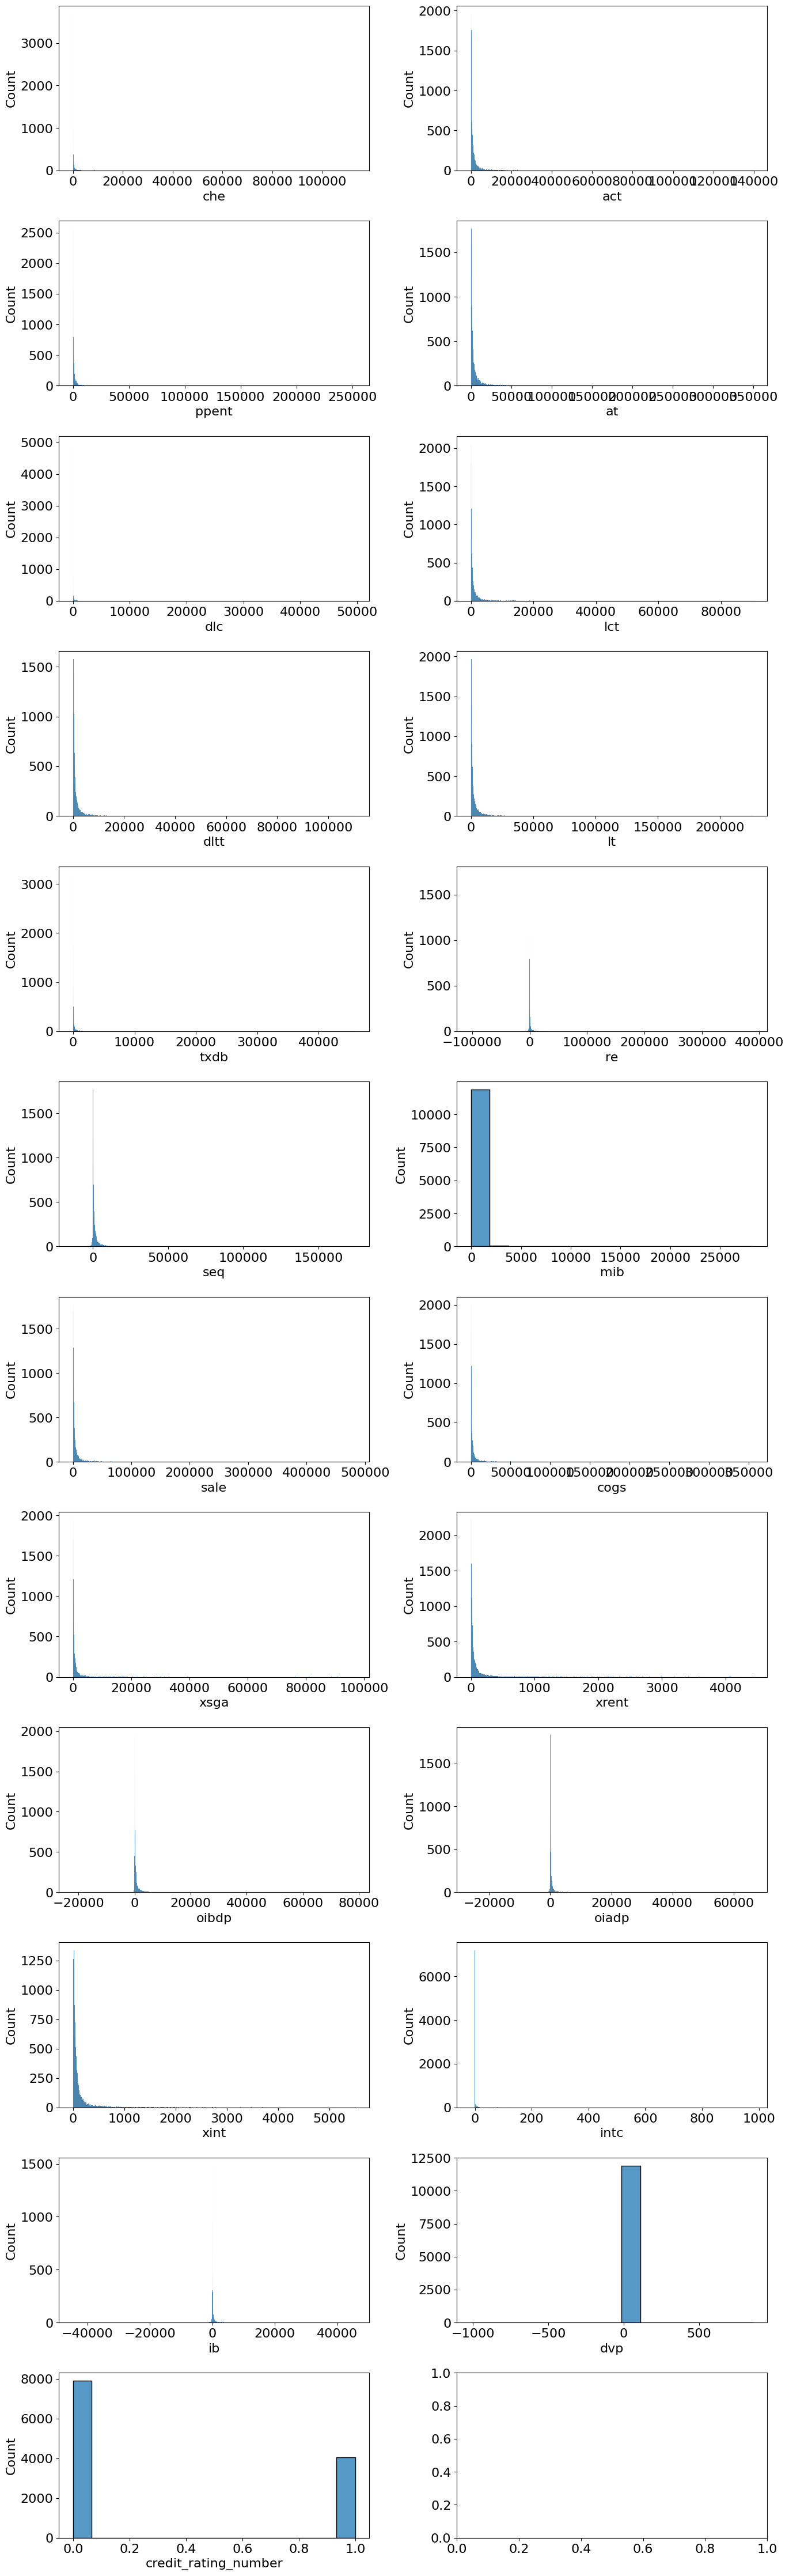

In [57]:


fig,ax=plt.subplots(12,2,figsize=(14,45))
ax=np.ravel(ax)
for i,f in enumerate(float_list):
    if f=='table':
        sns.histplot(df_train[f],discrete=True,ax=ax[i])
    else:
        sns.histplot(df_train[f],discrete=False,ax=ax[i])


plt.tight_layout();

The extremely long right tails (i.e., right-skew) is going to make things difficult to see. Let's start working with logarithms.

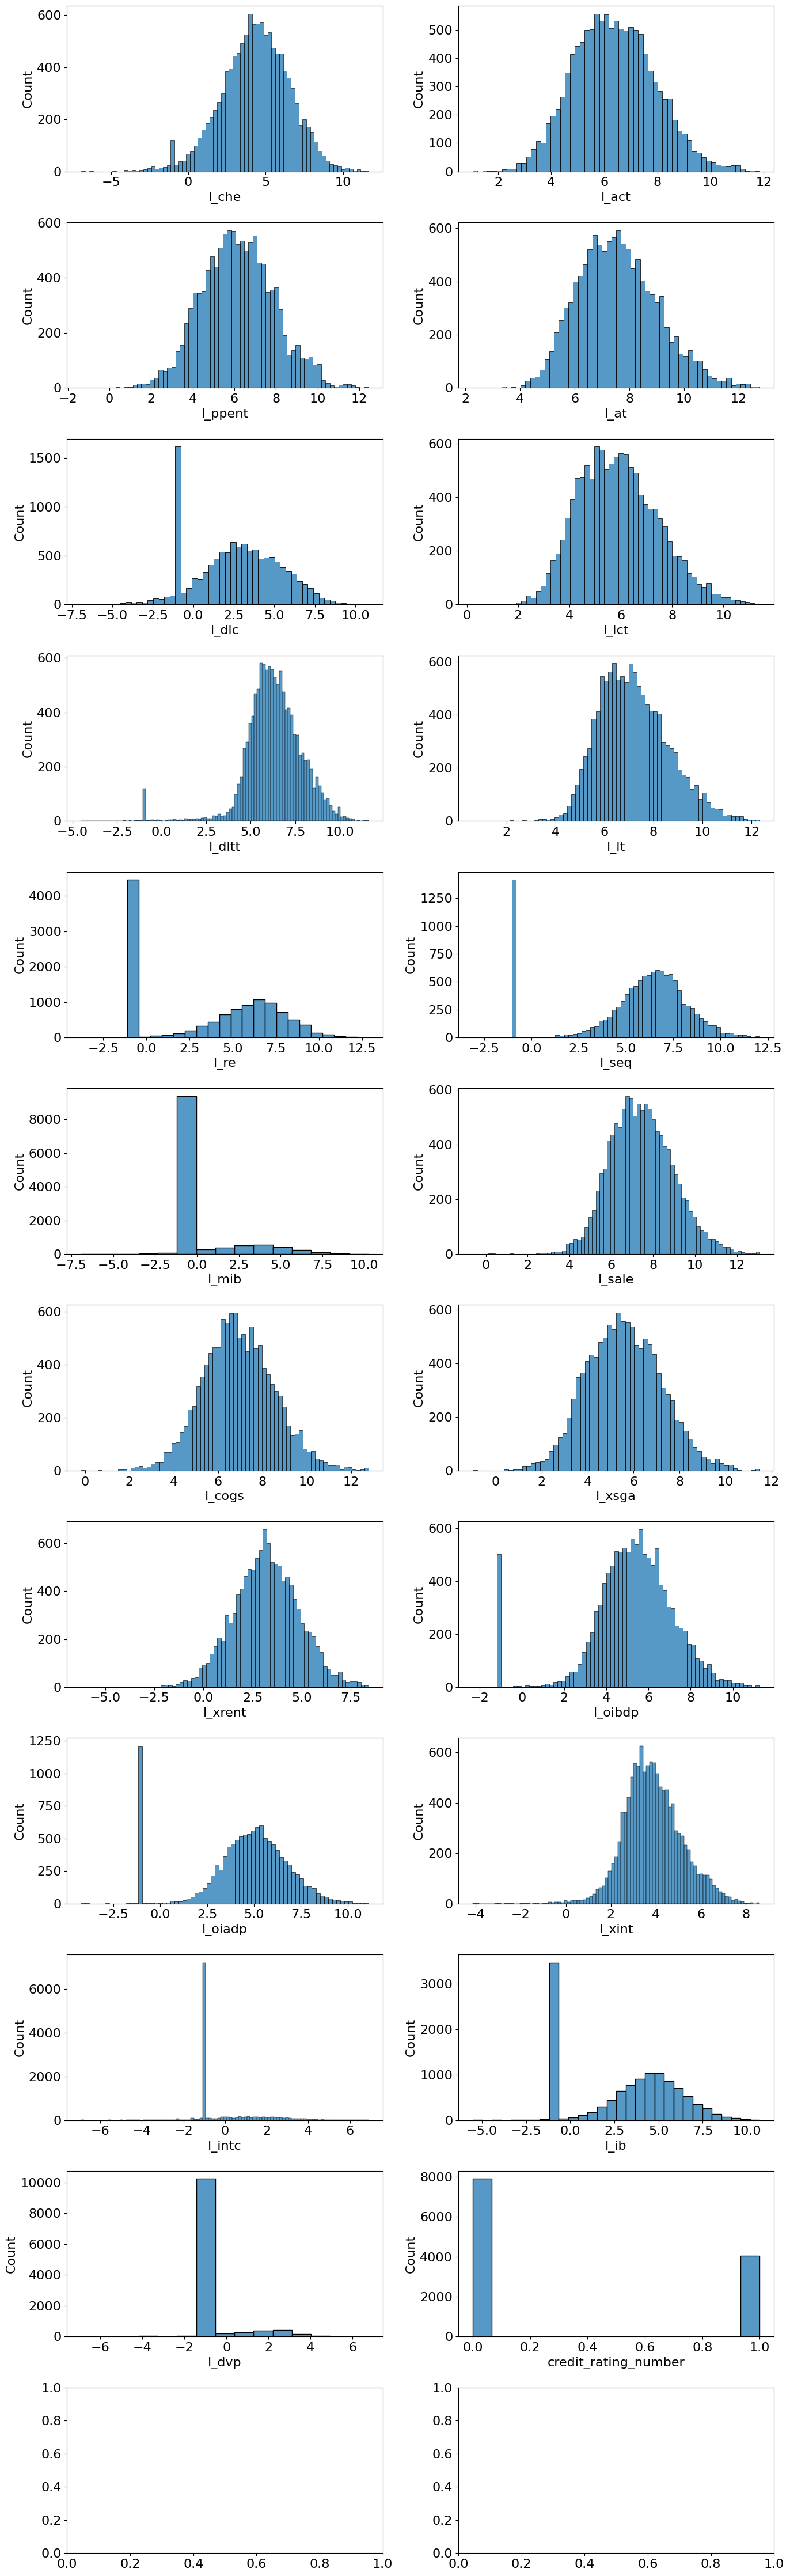

In [58]:
fig,ax=plt.subplots(12,2,figsize=(14,45))
ax=np.ravel(ax)
for i,f in enumerate(lfloat_list):
    if f=='table':
        sns.histplot(df_train[f],discrete=True,ax=ax[i])
    else:
        sns.histplot(df_train[f],discrete=False,ax=ax[i])


plt.tight_layout();

Correlation matrix

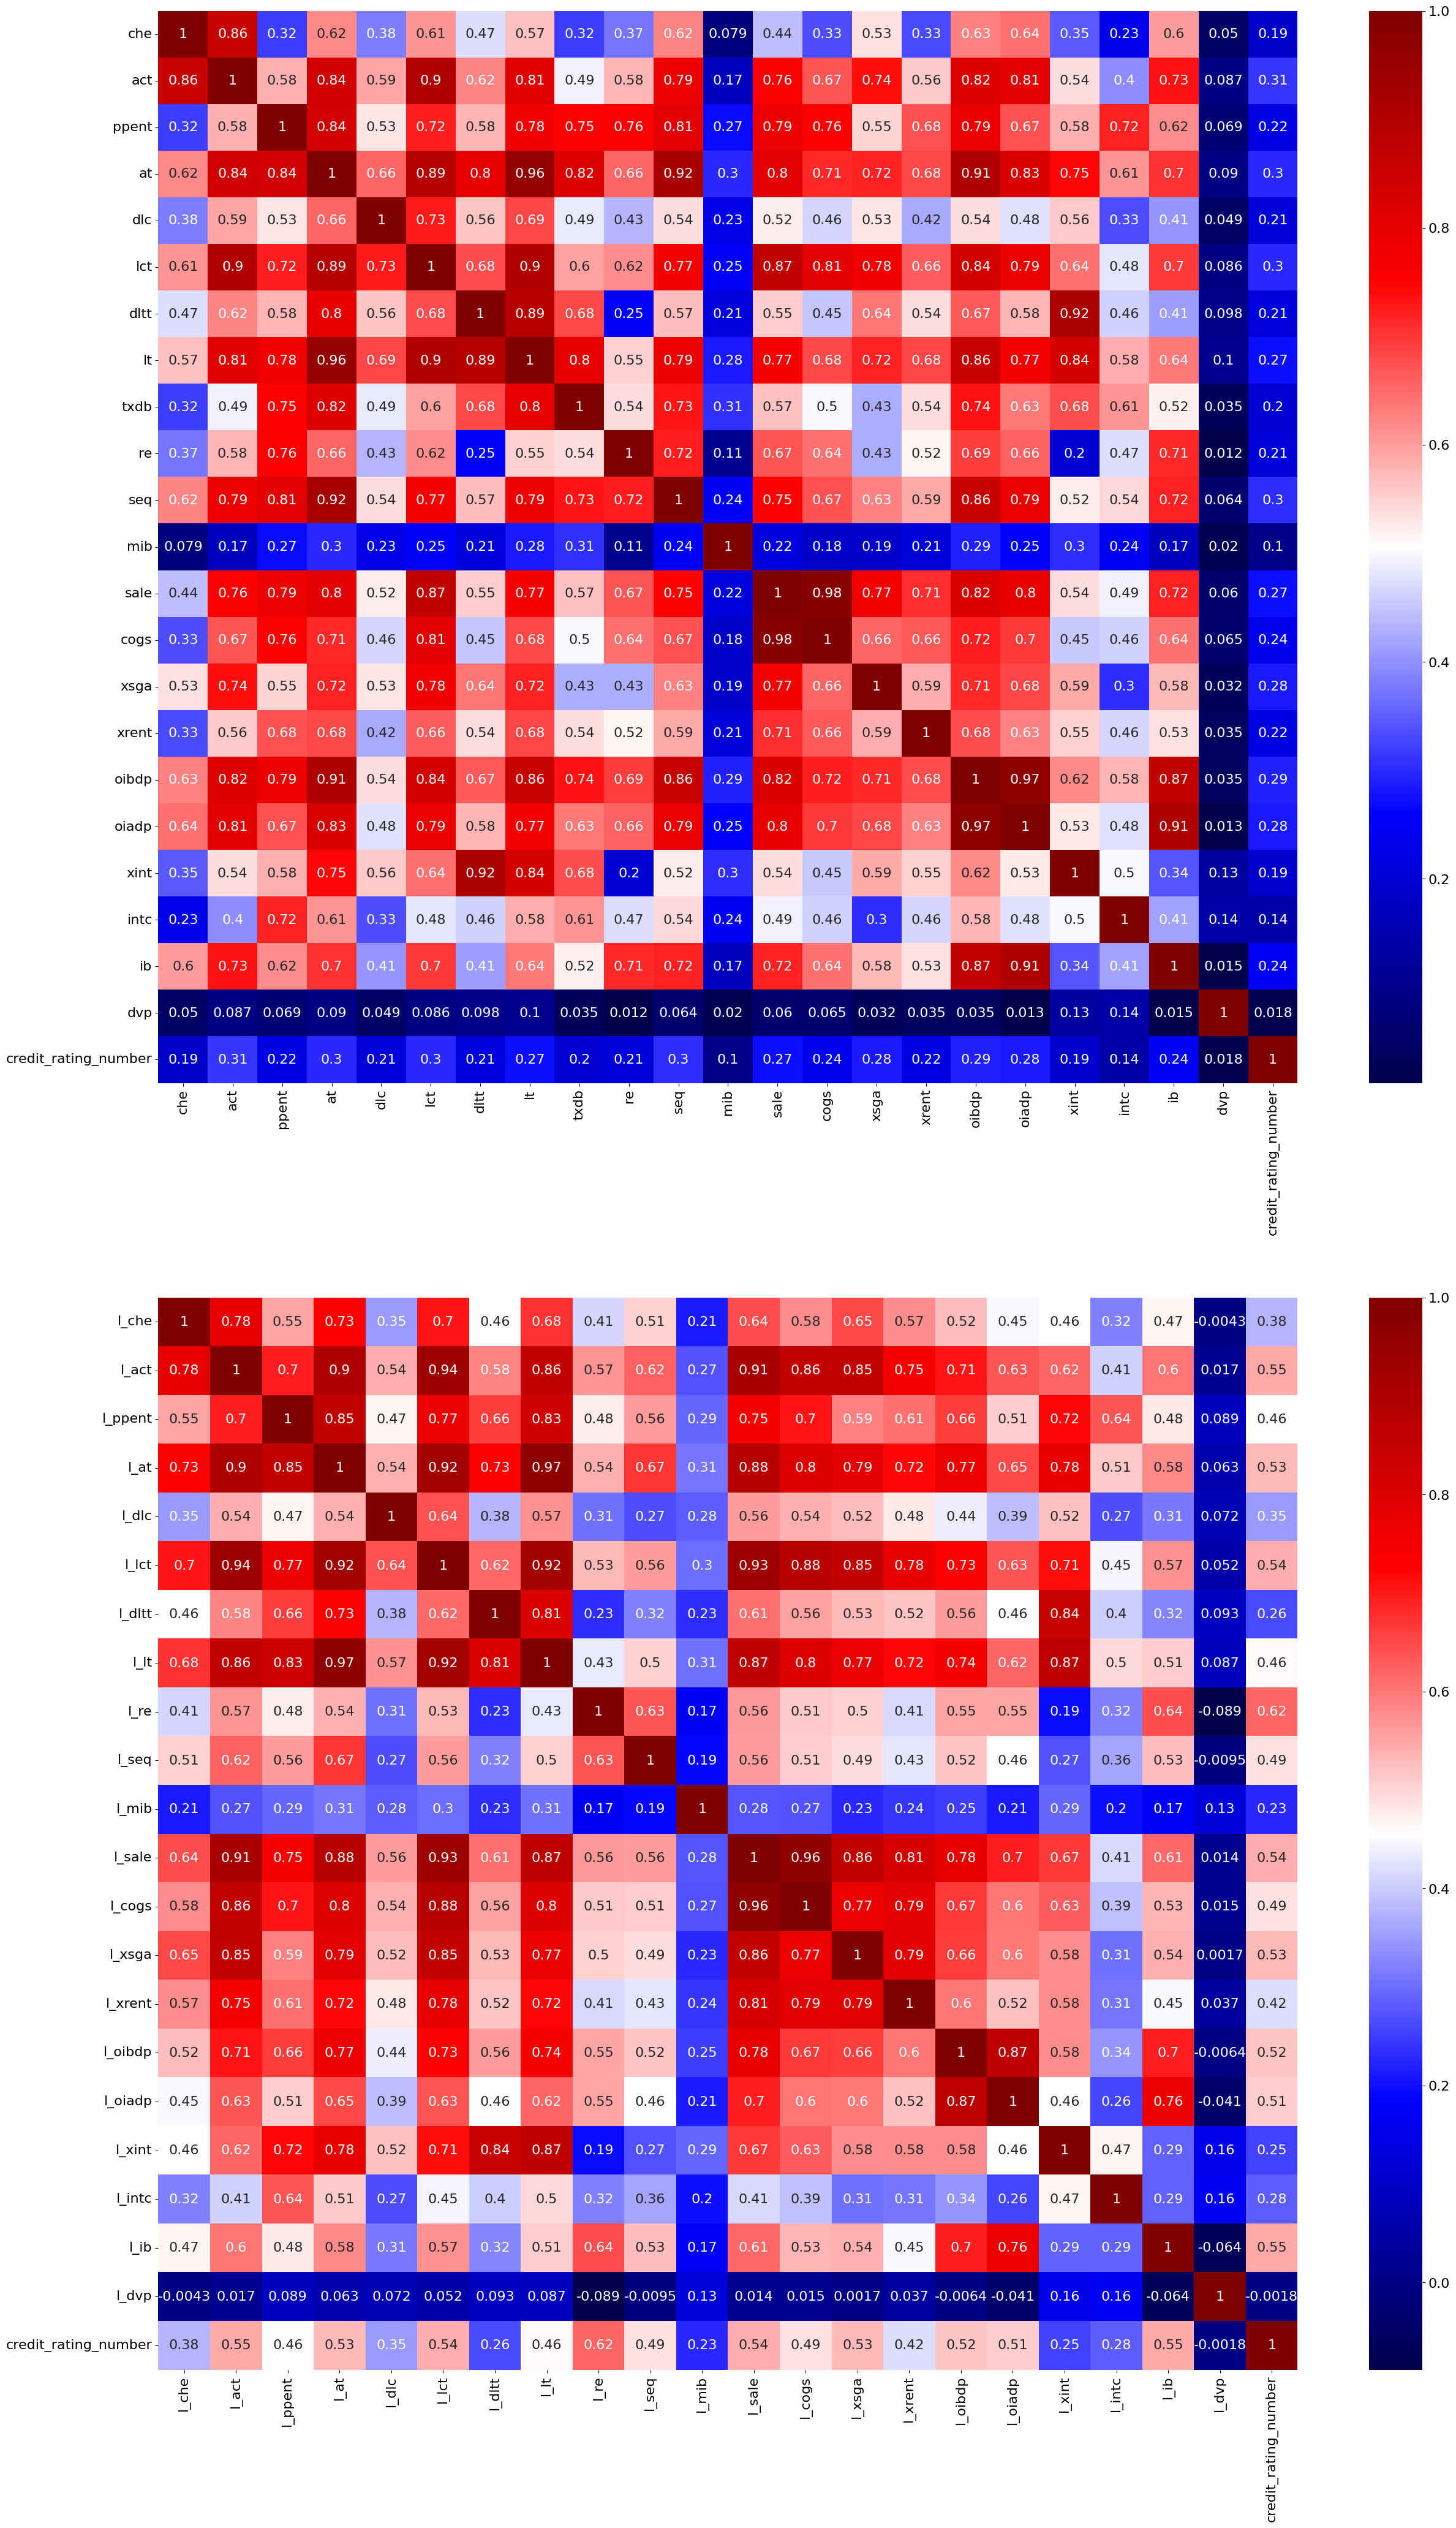

In [59]:
fig,ax=plt.subplots(2,1,figsize=(30,50))
c = df_train[float_list].corr()
sns.heatmap(c,annot=True,cmap='seismic',ax=ax[0])
c = df_train[lfloat_list].corr()
sns.heatmap(c,annot=True,cmap='seismic',ax=ax[1]);

# **Problem 4**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

vlist = ['l_che', 'l_act', 'l_ppent', 'l_at', 'l_dlc', 'l_lct', 'l_dltt',
       'l_lt', 'l_re', 'l_seq', 'l_mib', 'l_sale', 'l_cogs',
       'l_xsga', 'l_xrent', 'l_oibdp', 'l_oiadp', 'l_xint', 'l_intc', 'l_ib',
        'current_ratio', 'interest_coverage',
       'return_on_equity', 'asset_turnover', 'gross_profit_margin',
       'operating_margin', 'net_profit_margin', 'return_on_asset',
       'debt_ratio','credit_rating_number']

df_end = df_new[vlist]

train_df, test_df = train_test_split(df_end, test_size=0.25, random_state=42)

y_tr = train_df['credit_rating_number']
X_tr = train_df.iloc[:,0:-1]

y_test = test_df['credit_rating_number']
X_test = test_df.iloc[:,0:-1]

scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_test = scaler.transform(X_test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_tr, y_tr)


# 打印模型的所有参数
params = model.get_params()
for param_name, param_value in params.items():
    print(param_name, ":", param_value)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算模型准确率
accuracy = accuracy_score(y_test, y_pred)
print("准确率：", accuracy)

C : 1.0
class_weight : None
dual : False
fit_intercept : True
intercept_scaling : 1
l1_ratio : None
max_iter : 1000
multi_class : multinomial
n_jobs : None
penalty : l2
random_state : None
solver : lbfgs
tol : 0.0001
verbose : 0
warm_start : False
准确率： 0.8486825595984944


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

vlist = ['che', 'act',
       'ppent', 'at', 'dlc', 'lct', 'dltt', 'lt', 'txdb', 're', 'seq', 'mib',
       'sale', 'cogs', 'xsga', 'xrent', 'oibdp', 'oiadp', 'xint', 'intc', 'ib',
       'dvp','current_ratio', 'interest_coverage',
       'return_on_equity', 'asset_turnover', 'gross_profit_margin',
       'operating_margin', 'net_profit_margin', 'return_on_asset',
       'debt_ratio',  'credit_rating_number']

df_end = df_new[vlist]

train_df, test_df = train_test_split(df_end, test_size=0.25, random_state=42)

y_tr = train_df['credit_rating_number']
X_tr = train_df.iloc[:,0:-1]

y_test = test_df['credit_rating_number']
X_test = test_df.iloc[:,0:-1]

scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_tr, y_tr)


# 打印模型的所有参数
params = model.get_params()
for param_name, param_value in params.items():
    print(param_name, ":", param_value)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算模型准确率
accuracy = accuracy_score(y_test, y_pred)
print("准确率：", accuracy)

C : 1.0
class_weight : None
dual : False
fit_intercept : True
intercept_scaling : 1
l1_ratio : None
max_iter : 1000
multi_class : multinomial
n_jobs : None
penalty : l2
random_state : None
solver : lbfgs
tol : 0.0001
verbose : 0
warm_start : False
准确率： 0.8368883312421581


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

vlist = ['current_ratio', 'interest_coverage',
       'return_on_equity', 'asset_turnover', 'gross_profit_margin',
       'operating_margin', 'net_profit_margin', 'return_on_asset',
       'debt_ratio', 'credit_rating_number']

df_end = df_new[vlist]

train_df, test_df = train_test_split(df_end, test_size=0.25, random_state=42)

y_tr = train_df['credit_rating_number']
X_tr = train_df.iloc[:,0:-1]

y_test = test_df['credit_rating_number']
X_test = test_df.iloc[:,0:-1]

scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_tr, y_tr)


# 打印模型的所有参数
params = model.get_params()
for param_name, param_value in params.items():
    print(param_name, ":", param_value)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算模型准确率
accuracy = accuracy_score(y_test, y_pred)
print("准确率：", accuracy)

C : 1.0
class_weight : None
dual : False
fit_intercept : True
intercept_scaling : 1
l1_ratio : None
max_iter : 1000
multi_class : multinomial
n_jobs : None
penalty : l2
random_state : None
solver : lbfgs
tol : 0.0001
verbose : 0
warm_start : False
准确率： 0.7555834378920954


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

vlist = ['l_che', 'l_act', 'l_ppent', 'l_at', 'l_dlc', 'l_lct', 'l_dltt',
       'l_lt',  'l_re', 'l_seq', 'l_mib', 'l_sale', 'l_cogs',
       'l_xsga', 'l_xrent', 'l_oibdp', 'l_oiadp', 'l_xint', 'l_intc', 'l_ib',
       'credit_rating_number']

df_end = df_new[vlist]

train_df, test_df = train_test_split(df_end, test_size=0.25, random_state=42)

y_tr = train_df['credit_rating_number']
X_tr = train_df.iloc[:,0:-1]

y_test = test_df['credit_rating_number']
X_test = test_df.iloc[:,0:-1]

scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_tr, y_tr)


# 打印模型的所有参数
params = model.get_params()
for param_name, param_value in params.items():
    print(param_name, ":", param_value)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算模型准确率
accuracy = accuracy_score(y_test, y_pred)
print("准确率：", accuracy)

C : 1.0
class_weight : None
dual : False
fit_intercept : True
intercept_scaling : 1
l1_ratio : None
max_iter : 1000
multi_class : multinomial
n_jobs : None
penalty : l2
random_state : None
solver : lbfgs
tol : 0.0001
verbose : 0
warm_start : False
准确率： 0.8469259723964868


### **SGD Model**

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

vlist = ['l_che', 'l_act', 'l_ppent', 'l_at', 'l_dlc', 'l_lct', 'l_dltt', 'l_lt', 'l_txdb', 'l_re', 'l_seq', 'l_mib', 'l_sale', 'l_cogs', 'l_xsga', 'l_xrent', 'l_oibdp', 'l_oiadp', 'l_xint', 'l_intc', 'l_ib', 'l_dvp', 'credit_rating_number']
df_end = df_new[vlist]

train_df, test_df = train_test_split(df_end, test_size=0.25, random_state=42)

y_tr = train_df['credit_rating_number']
X_tr = train_df.iloc[:,0:-1]
y_test = test_df['credit_rating_number']
X_test = test_df.iloc[:,0:-1]

scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_test = scaler.transform(X_test)

model = SGDClassifier(loss='log', penalty='l2', alpha=0.0001, random_state=42, max_iter=1000, tol=1e-3)
model.fit(X_tr, y_tr)

# 打印模型的所有参数
params = model.get_params()
for param_name, param_value in params.items():
    print(param_name, ":", param_value)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算模型准确率
accuracy = accuracy_score(y_test, y_pred)
print("准确率:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


alpha : 0.0001
average : False
class_weight : None
early_stopping : False
epsilon : 0.1
eta0 : 0.0
fit_intercept : True
l1_ratio : 0.15
learning_rate : optimal
loss : log
max_iter : 1000
n_iter_no_change : 5
n_jobs : None
penalty : l2
power_t : 0.5
random_state : 42
shuffle : True
tol : 0.001
validation_fraction : 0.1
verbose : 0
warm_start : False
准确率: 0.8464240903387704
